In [77]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

/var/folders/j3/dr9c4mcx23gcdm0215yvb0h00000gn/T/ipykernel_6484/1902957474.py:16: RuntimeWarning: invalid value encountered in log
  return a*np.log(x+c) + d


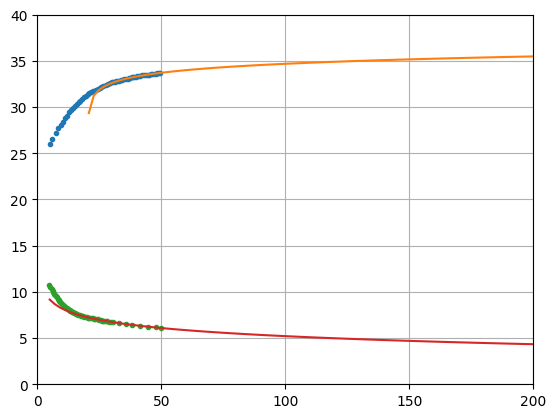

35.084267528185336
35.8796657678231
4.785101069481519
4.758115282611016
theta_n = 35 deg
theta_e = 5 deg


In [78]:
# Load the CSV file into a DataFrame
data = pd.read_csv('theta_n.csv', header=None, names=['x', 'y'])

# Extract x and y values
x_theta_n = data['x'].tolist()
y_theta_n = data['y'].tolist()

data2 = pd.read_csv('theta_e.csv', header=None, names=['x1', 'y1'])
x_theta_e = data2['x1'].tolist()
y_theta_e = data2['y1'].tolist()

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c

def func_lnlaw(x, c, a, d):
    return a*np.log(x+c) + d
#p0 = np.asarray([1,1e5,-2]) 
#p0 = np.asarray([1,1e5,-2]) 
start_ratio = 1.9
popt, pcov = scipy.optimize.curve_fit(func_powerlaw, x_theta_n[int(len(x_theta_n)/start_ratio):], y_theta_n[int(len(y_theta_n)/start_ratio):], maxfev = 100000)
popt2, pcov2 = scipy.optimize.curve_fit(func_lnlaw, x_theta_n[int(len(x_theta_n)/start_ratio):], y_theta_n[int(len(y_theta_n)/start_ratio):], maxfev = 100000)
# Print the extracted x and y values
#, xp, func_powerlaw(xp, *popt), '--'
xp = np.linspace(5, 200, 100)
plt.plot(x_theta_n, y_theta_n, '.', xp, func_lnlaw(xp, *popt2))

start_ratio = 1.8
popt3, pcov3 = scipy.optimize.curve_fit(func_lnlaw, x_theta_e[int(len(x_theta_e)/start_ratio):], y_theta_e[int(len(y_theta_e)/start_ratio):], maxfev = 100000)
popt4, pcov4 = scipy.optimize.curve_fit(func_powerlaw, x_theta_e[int(len(x_theta_e)/start_ratio):], y_theta_e[int(len(y_theta_e)/start_ratio):], maxfev = 100000)
plt.plot(x_theta_e, y_theta_e, '.', xp, func_lnlaw(xp, *popt3))



plt.xlim(0,200)
plt.ylim(0,40)
plt.xticks(range(0,250,50))
plt.yticks(range(0,45,5))
plt.grid(True)
plt.show()

print(func_lnlaw(140, *popt2))
print(func_powerlaw(140, *popt))
#print(*popt2)
print(func_lnlaw(140, *popt3))
print(func_powerlaw(140, *popt4))

print(f"theta_n = {math.floor(func_lnlaw(140, *popt2))} deg")
print(f"theta_e = {math.ceil(func_lnlaw(140, *popt3))} deg")